In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
import pyspark.sql.functions as F

In [3]:
spark = SparkSession \
    .builder \
    .appName("nycflights") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "true") \
    .getOrCreate()

In [4]:
# Create Spark DataFrame
from nycflights13 import flights as flights_pd
flights = spark.createDataFrame(flights_pd)

In [5]:
from spark_plot import mpl

In [6]:
mpl.set_defaults()

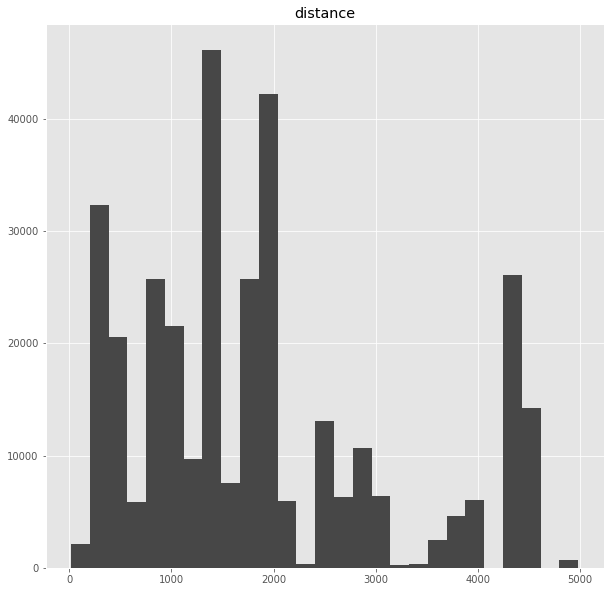

In [42]:
ax = mpl.hist(flights, "distance", figsize=(10,10), color="#474747")

In [43]:
ax[0].get_figure().savefig("../docs/flights_hist.png")